# K-means Clustering Algorithm

##### Author: Chenyang Skylar Li

# Table of Contents
1. [Introduction](#introduction)
2. [Mathematical Fundations](#mathematical-fundations)
3. [Learning Algorithm](#learning-algorithm)
    - [Define a K-means class](#define-a-k-means-class)
    - [Showcase the above classifier in the blobs dataset](#showcase-the-above-classifier-in-the-blobs-dataset)
4. [Difference between K-means and DBSCAN](#difference-between-k-means-and-dbscan)
    - [Comparison of K-means and DBSCAN on the blobs dataset](#comparison-of-k-means-and-dbscan-on-the-blobs-dataset)
5. [Pros and Cons](#pros-and-cons)
6. [Suitable Tasks and Datasets](#suitable-tasks-and-datasets)
7. [References](#references)

## Introduction
K-means is a widely-used, partitioning-based clustering algorithm, primarily designed to group data points in a dataset into a pre-defined number of non-overlapping subgroups or clusters. Introduced by Stuart Lloyd in 1957 and later published by Edward W. Forgy in 1965, the algorithm operates based on the principle of minimizing the within-cluster sum of squares. This implies that it tries to make the intra-cluster data points as similar as possible while also keeping the clusters distinct from each other.

The fundamental objective of the K-means algorithm is to partition data points into distinct clusters where each data point belongs to the cluster with the closest mean value. Given its efficiency and simplicity, K-means has been utilized in a wide variety of applications including market segmentation, computer vision, geospatial analysis, anomaly detection, and many more. Despite its widespread use, it's worth noting that K-means is highly sensitive to initial centroid selection and can sometimes converge to a local optimum. However, techniques such as [k-means++](https://towardsdatascience.com/understanding-k-means-k-means-and-k-medoids-clustering-algorithms-ad9c9fbf47ca) have been proposed to deal with some of these challenges.


## Mathematical Foundations

The mathematical foundations of the K-means algorithm revolve around the concept of cluster assignment and centroid update, aiming to minimize the sum of the squared Euclidean distances between each point and the center of its assigned cluster.

The objective function for K-means, often called the inertia or within-cluster sum-of-squares (WCSS) criterion, can be written as follows:

$$
J = \sum_{i=1}^k \sum_{x \in C_i} \| x - \mu_i \|^2
$$

where:
- $J$ is the objective function,
- $k$ is the number of clusters,
- $C_i$ is the set of points that belong to cluster $i$,
- $x$ is a point in $C_i$,
- $\mu_i$ is the centroid (mean) of points in $C_i$, and
- $\| x - \mu_i \|^2$ is the squared Euclidean distance from a point to the centroid of its assigned cluster.

The K-means algorithm iteratively performs two steps until convergence:
1. **Assignment Step**: Each data point is assigned to its nearest centroid, where 'nearest' is defined using the Euclidean distance. Mathematically, this can be expressed as:

$$
C_i = \{ x : \| x - \mu_i \|^2 \leq \| x - \mu_j \|^2 \; \forall j, 1 \leq j \leq k \}
$$

2. **Update Step**: The centroids are recomputed by taking the mean of all data points assigned to that centroid's cluster:

$$
\mu_i = \frac{1}{|C_i|} \sum_{x \in C_i} x
$$

This process is repeated until the centroids do not change significantly or a maximum number of iterations is reached. The algorithm converges to a result where the within-cluster sum of squares cannot be decreased further by changing the class memberships or centroids.


## Learning Algorithm

The learning algorithm for k-means consists of the following steps:

1. Initialize the centroids randomly by selecting k data points from the dataset. The number of clusters (k) is a hyperparameter of the k-means algorithm.
2. Assign each data point to the nearest centroid.
3. Update the centroids by calculating the mean of all the data points assigned to each centroid.
4. Repeat steps 2 and 3 until the centroids' positions do not change significantly or a maximum number of iterations is reached.

### Define a K-means class



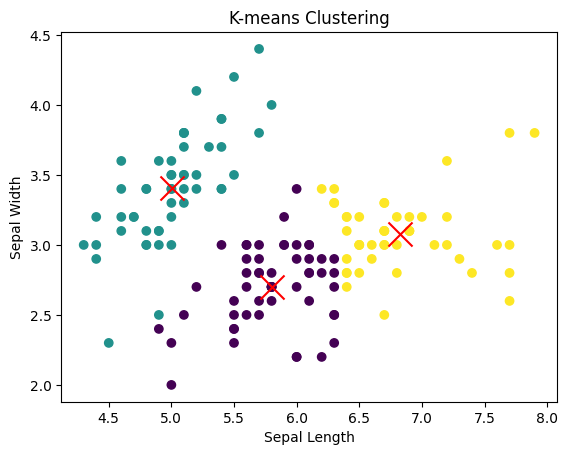

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Function to calculate Euclidean distance between two points
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# K-means class
class KMeans:
    def __init__(self, n_clusters=3, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def fit_predict(self, X):
        np.random.seed(self.random_state)
        centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

        for _ in range(self.max_iter):
            clusters = [np.argmin([euclidean_distance(x, centroid) for centroid in centroids]) for x in X]
            new_centroids = [X[np.array(clusters) == i].mean(axis=0) for i in range(self.n_clusters)]

            if np.allclose(centroids, new_centroids):
                break
            centroids = new_centroids

        self.cluster_centers_ = np.array(centroids)
        return np.array(clusters)

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features for easy visualization

# Apply the k-means algorithm
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Visualize the results
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-means Clustering')
plt.show()


### Showcase the above classifier in the blobs dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features for easy visualization

# Apply the k-means algorithm
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Evaluate the model using the elbow method
inertia_values = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.plot(K, inertia_values, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()

# Visualize the results
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-means Clustering')
plt.show()


## Difference between K-means and DBSCAN

The main differences between k-means and [DBSCAN](./DBSCN.ipynb) are:

- K-means requires the number of clusters as an input parameter, while DBSCAN does not.
- K-means is sensitive to the initial placement of centroids and may converge to local optima, while DBSCAN is more robust due to its density-based approach.
- K-means tends to work well with spherical clusters and may struggle with clusters of arbitrary shapes, while DBSCAN can find clusters of any shape.
- K-means is less robust to noise compared to DBSCAN, which can identify and separate noise points from clusters.
- DBSCAN can handle datasets with varying densities, while k-means assumes similar densities across clusters.

Here's a table to summarize the difference between DBSCAN and k-means clustering algorithms:

| Criterion            | DBSCAN                                          | k-means                                          |
|----------------------|-------------------------------------------------|--------------------------------------------------|
| Algorithm type       | Density-based clustering                        | Partition-based clustering                       |
| Cluster shapes       | Can handle clusters of arbitrary shapes         | Assumes spherical clusters                        |
| Number of clusters   | Automatically determined by the algorithm       | Must be specified in advance (hyperparameter)    |
| Noise handling       | Identifies and separates noise points           | No explicit noise handling; noise affects clusters|
| Cluster assignment   | Points can remain unassigned (noise)            | All points are assigned to a cluster             |
| Sensitivity to initialization | Not sensitive to initialization       | Sensitive to initial centroids selection         |
| Complexity           | $O(n \log n)$ with suitable index structure     | Typically $O(n \cdot k \cdot I \cdot t)$, where $n$: points, $k$: clusters, $I$: iterations, $t$: dimensions |

### Comparison of K-means and DBSCAN on the blobs dataset



## Pros and Cons

**Pros:**
- Easy to understand and implement.
- Efficient in terms of time complexity.
- Works well with large datasets.
- Guaranteed to converge.

**Cons:**
- Requires the number of clusters as an input parameter.
- Sensitive to the initial placement of centroids.
- Assumes that clusters are spherical and have similar densities.
- Can get stuck in local optima.
- Does not work well with categorical data.

## Suitable Tasks and Datasets

K-means clustering is a versatile algorithm that is suitable for a variety of tasks and datasets:

1. **Large datasets:** K-means is computationally efficient, especially with a large number of variables, making it suitable for big data tasks.

2. **Numerical data:** K-means works well with numerical data. Since it uses Euclidean distance to measure similarity, it's more suitable for continuous numerical data.

3. **Market segmentation:** K-means is often used in marketing for customer segmentation, where customers with similar behaviors are grouped together.

4. **Anomaly detection:** K-means can be used for anomaly detection where data points that are far away from any cluster center can be considered anomalies or outliers.

5. **Image compression:** K-means can be used for image compression by reducing the number of colors in an image to k.

6. **Initial cluster center for other algorithms:** K-means is often used to provide initial cluster centers for other clustering algorithms.

However, it's worth noting that K-means makes a few assumptions that may limit its usefulness with certain types of data or tasks. As mentioned above, it assumes spherical clusters of equal size, which may not always hold true. And as mentioned earlier, it works best with numerical data and may not be suitable for categorical data.


## References

1. Lloyd, S. (1982). Least squares quantization in PCM. IEEE transactions on information theory, 28(2), 129-137.
2. Forgy, E. W. (1965). Cluster analysis of multivariate data: Efficiency vs. interpretability of classifications. biometrics, 21, 768-769.
3. Scikit-Learn: K-means clustering. https://scikit-learn.org/stable/modules/clustering.html#k-means
4. Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.".